# EPIC Institute of Technology
## Data Science Mid-term Exam

# Data

gender.csv

### Objective features:

Age
Height
Weight
Sex (gender)
Measurement results:

Upper and lower blood pressure (ap_hi, ap_lo)
Cholesterol (cholesterol)
Glucose (glucose)

### Subjective features (according to patients):

Smoking (smoke)
Drinking alcohol (alco)
Physical activity (active)
Target sign (which will be interesting to predict):
The presence of cardiovascular diseases according to the results of a classic medical examination (cardio)

Age is given in days.
The values of cholesterol and glucose are represented by one of three classes: normal, above normal, significantly above normal.
The values of subjective features are binary.

All figures are given at the time of inspection.

## Task 0
### Import necesssary libraries and read the data. Note that data is separated with semicolon ';'

In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/gender.csv', delimiter=';')
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


## Task 1 (2 points)
### Exploratory Data Analysis (EDA): Create Descriptive Graphs for Initial Data Exploration.
- Histograms for Age, Height, Weight, ap_hi, and ap_lo to visualize the distribution.
- Bar charts for gender, smoke, alco, and active to show the count of each category.
- Any other graphs that you find useful

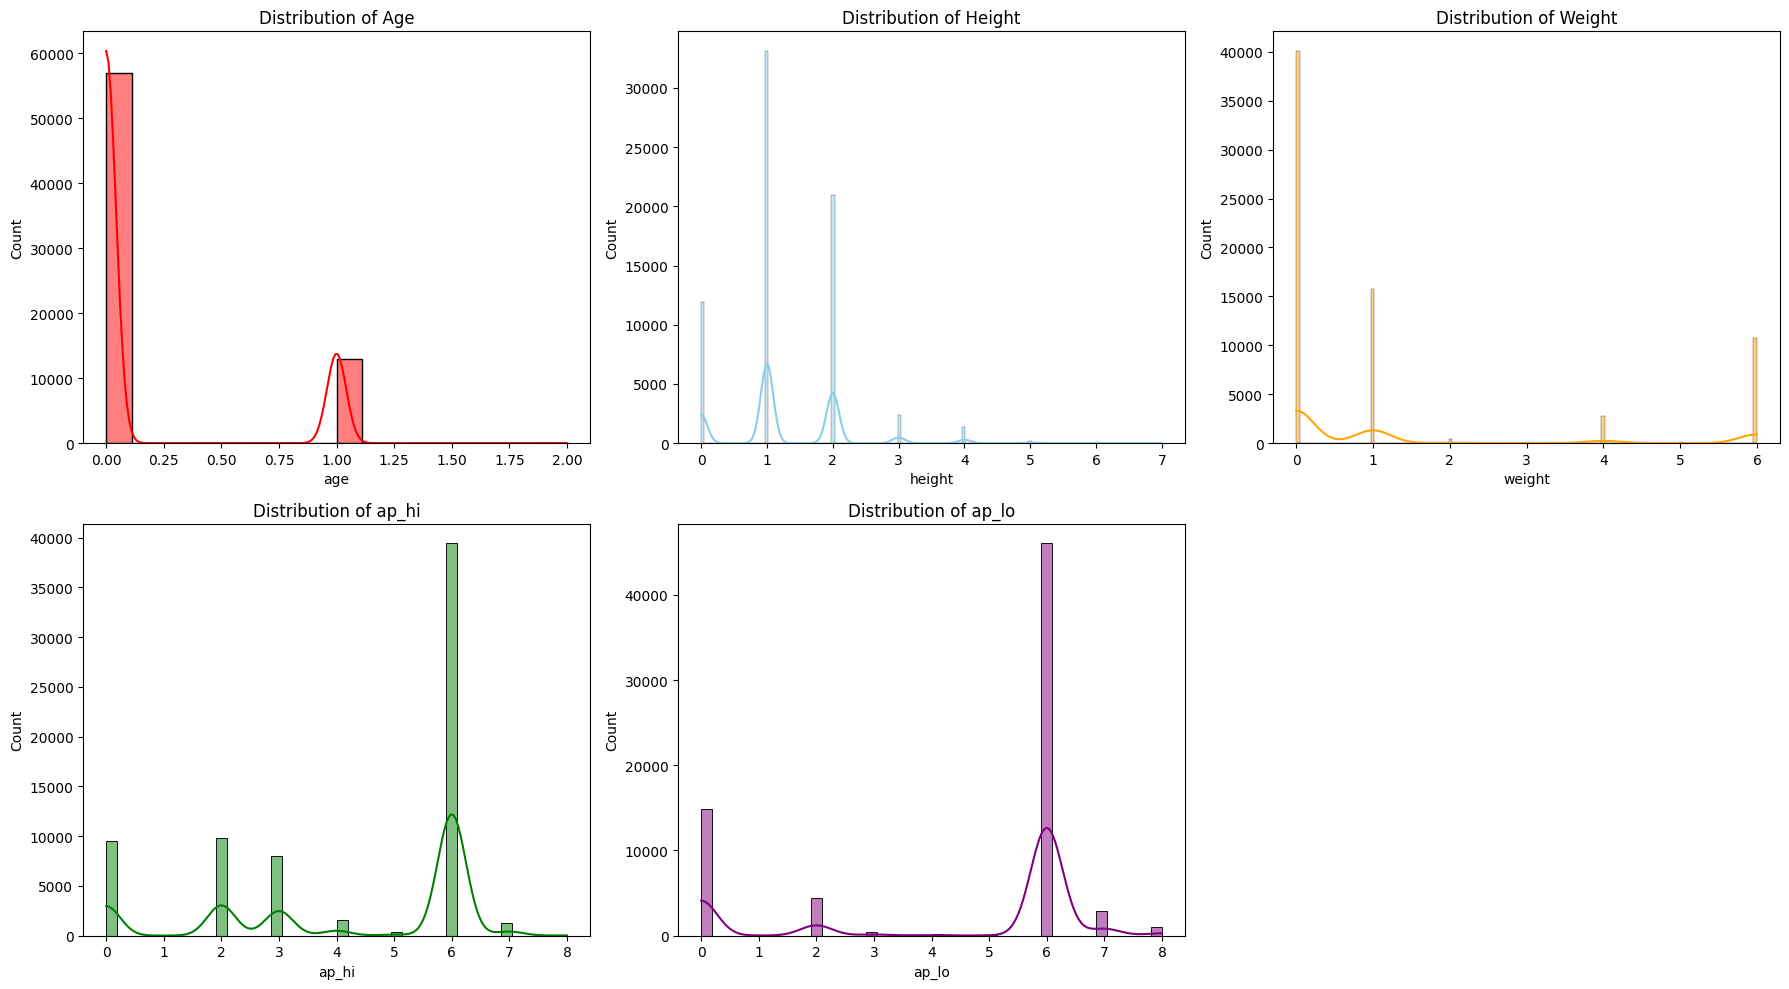

In [104]:
import seaborn as sns

# Histograms

plt.figure(figsize=(18, 10))

plt.subplot(2, 3, 1)
sns.histplot(df['age'], kde=True, color='red')
plt.title('Distribution of Age')

plt.subplot(2, 3, 2)
sns.histplot(df['height'], kde=True, color='skyblue')
plt.title('Distribution of Height')

plt.subplot(2, 3, 3)
sns.histplot(df['weight'], kde=True, color='orange')
plt.title('Distribution of Weight')

plt.subplot(2, 3, 4)
sns.histplot(df['ap_hi'], kde=True, color='green')
plt.title('Distribution of ap_hi')

plt.subplot(2, 3, 5)
sns.histplot(df['ap_lo'], kde=True, color='purple')
plt.title('Distribution of ap_lo')

plt.tight_layout()
plt.show()


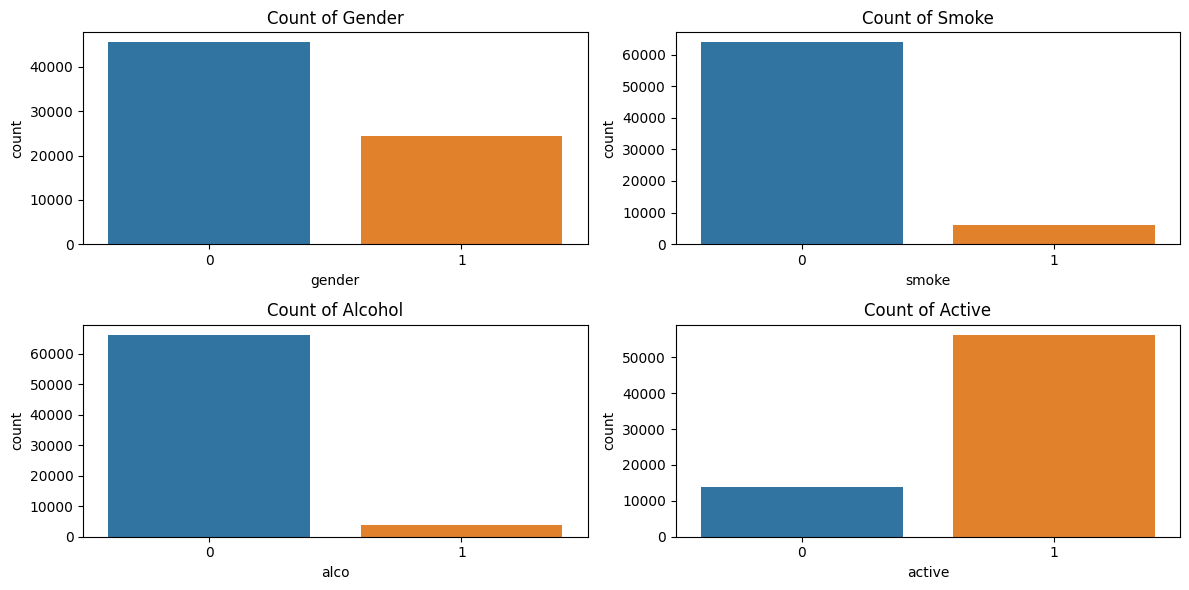

In [109]:
# Bar charts

plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
sns.countplot(x='gender', data=df)
plt.title('Count of Gender')

plt.subplot(2, 2, 2)
sns.countplot(x='smoke', data=df)
plt.title('Count of Smoke')

plt.subplot(2, 2, 3)
sns.countplot(x='alco', data=df)
plt.title('Count of Alcohol')

plt.subplot(2, 2, 4)
sns.countplot(x='active', data=df)
plt.title('Count of Active')

plt.tight_layout()
plt.show()


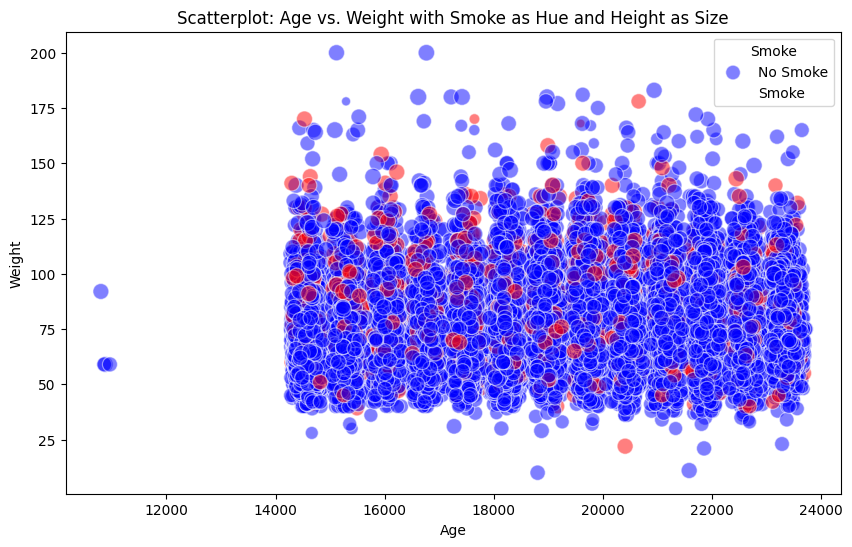

In [146]:
#other graphs

plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='weight', data=df, hue='smoke', palette={0: 'blue', 1: 'red'}, size='height', sizes=(20, 200), alpha=0.5)

plt.title('Scatterplot: Age vs. Weight with Smoke as Hue and Height as Size')
plt.xlabel('Age')
plt.ylabel('Weight')
plt.legend(title='Smoke', labels=['No Smoke', 'Smoke'])
plt.show()

## Task 2 (1 point)
### Data Cleaning: Identify and Remove Outliers in Non-Binary Features
- Identify and remove 5% (both bottom and top) of outliers for non-binary features.
- Identify and remove other inappropriate data (such as negative values)

In [124]:
def simplify_ages(df):
    df['age'] = df['age'].fillna(-0.5)
    bins = (-1, 0, 5, 12, 18, 25, 35, 60, 120)
    group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
    categories = pd.cut(df['age']/365, bins, labels=group_names)
    df['age'] = categories
    return df

def simplify_height(df):
    df['height'] = df['height'].fillna(-0.5)
    bins = (-1, 140, 150, 160, 170, 180, 190, 220)
    group_names = ['Unknown', 'Short', 'Below Average', 'Average', 'Above Average', 'Tall', 'Very Tall']
    categories = pd.cut(df['height'], bins, labels=group_names)
    df['height'] = categories
    return df

def simplify_weight(df):
    df['weight'] = df['weight'].fillna(-0.5)
    bins = (-1, 40, 60, 80, 100, 120, 140, 200, 300)
    group_names = ['Unknown', 'Very Light', 'Light', 'Normal', 'Overweight', 'Obese I', 'Obese II', 'Obese III']
    categories = pd.cut(df['weight'], bins, labels=group_names)
    df['weight'] = categories
    return df

def simplify_ap_hi_blood_pressure(df):
    df['ap_hi'] = df['ap_hi'].fillna(-0.5)
    bins = (-1, 90, 120, 130, 140, 160, 180, 250, 500)
    group_names = ['Unknown', 'Normal', 'Elevated', 'Hypertension Stage 1', 'Hypertension Stage 2','Hypertensive Crisis', 'Hypertensive Emergency', 'Extreme Hypertension']

    categories = pd.cut(df['ap_hi'], bins, labels=group_names)
    df['ap_hi'] = categories

    return df

def simplify_ap_lo_blood_pressure(df):
    df['ap_lo'] = df['ap_lo'].fillna(-1)
    bins = (-2, 60, 80, 90, 100, 110, 120, 140, 300)
    group_names = ['Unknown', 'Normal', 'Elevated', 'High Normal', 'Hypertension Stage 1', 'Hypertension Stage 2', 'Hypertensive Crisis', 'Extreme Hypertension']
    categories = pd.cut(df['ap_lo'], bins, labels=group_names)
    df['ap_lo'] = categories
    return df

def transform_features(df):

    df = simplify_ages(df)
    df = simplify_height(df)
    df = simplify_weight(df)
    df = simplify_ap_hi_blood_pressure(df)
    df = simplify_ap_lo_blood_pressure(df)
    return df

df = pd.read_csv('/content/gender.csv', delimiter=';')
df = transform_features(df)
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,Adult,2,Average,Light,Normal,Normal,1,1,0,0,1,0
1,1,Adult,1,Below Average,Normal,Hypertension Stage 1,Elevated,3,1,0,0,1,1
2,2,Adult,1,Average,Light,Elevated,Normal,3,1,0,0,0,1
3,3,Adult,2,Average,Normal,Hypertension Stage 2,High Normal,1,1,0,0,1,1
4,4,Adult,1,Below Average,Very Light,Normal,Unknown,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,Adult,2,Average,Light,Normal,Normal,1,1,1,0,1,0
69996,99995,Senior,1,Below Average,Obese I,Hypertension Stage 1,Elevated,2,2,0,0,1,1
69997,99996,Adult,2,Tall,Overweight,Hypertensive Crisis,Elevated,3,1,0,1,0,1
69998,99998,Senior,1,Average,Light,Hypertension Stage 1,Normal,1,2,0,0,0,1


In [76]:
from sklearn import preprocessing

def encode_features(df):
    features = ['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo']
    df_combined = pd.concat([df[features]])

    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(df_combined[feature])
        df[feature] = le.transform(df[feature])

    return df

df = encode_features(df)
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,0,1,1,0,6,6,1,1,0,0,1,0
1,1,0,0,2,1,2,0,3,1,0,0,1,1
2,2,0,0,1,0,0,6,3,1,0,0,0,1
3,3,0,1,1,1,3,2,1,1,0,0,1,1
4,4,0,0,2,6,6,7,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,0,1,1,0,6,6,1,1,1,0,1,0
69996,99995,1,0,2,2,2,0,2,2,0,0,1,1
69997,99996,0,1,4,4,4,0,3,1,0,1,0,1
69998,99998,1,0,1,0,2,6,1,2,0,0,0,1


## Task 3 (1 point)
### Confidence Intervals: Calculate Confidence Intervals for Height and Weight
- After cleaning, calculate the 95% confidence interval for height and 99.7% for weight.

In [77]:
from scipy import stats

height_confidence_interval = stats.t.interval(0.95, len(df['height']) - 1, loc=np.mean(df['height']), scale=stats.sem(df['height']))
weight_confidence_interval = stats.norm.interval(0.997, loc=np.mean(df['weight']), scale=stats.sem(df['weight']))

print(f"95% Confidence Interval for Height: {height_confidence_interval}")
print(f"99.7% Confidence Interval for Weight: {weight_confidence_interval}")


95% Confidence Interval for Height: (1.2660842582448542, 1.2791443131837172)
99.7% Confidence Interval for Weight: (1.3049517031238431, 1.3535911540190142)


## Task 4 (1 point)
### Data Transformation - One-Hot Encoding:
- Apply one-hot encoding for cholesterol and glucose.

In [131]:
df = pd.read_csv('/content/gender.csv', delimiter=';')

df = pd.concat([df, pd.get_dummies(df['cholesterol'], prefix='cholesterol')], axis=1)
df.drop(['cholesterol'], axis=1, inplace=True)

df = pd.concat([df, pd.get_dummies(df['gluc'], prefix='gluc')], axis=1)
df.drop(['gluc'], axis=1, inplace=True)
df

,id,age,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio,cholesterol_1,cholesterol_2,cholesterol_3,gluc_1,gluc_2,gluc_3
0,0,18393,2,168,62.0,110,80,0,0,1,0,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,0,0,1,1,0,0,1,1,0,0
2,2,18857,1,165,64.0,130,70,0,0,0,1,0,0,1,1,0,0
3,3,17623,2,169,82.0,150,100,0,0,1,1,1,0,0,1,0,0
4,4,17474,1,156,56.0,100,60,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,0,1,0,1,0,0,1,0,0
69996,99995,22601,1,158,126.0,140,90,0,0,1,1,0,1,0,0,1,0
69997,99996,19066,2,183,105.0,180,90,0,1,0,1,0,0,1,1,0,0
69998,99998,22431,1,163,72.0,135,80,0,0,0,1,1,0,0,0,1,0


## Task 5 (2 points)
### Hypothesis Testing - T-Test: Investigate Gender Differences in Average Height
- Before conducting the two-tailed t-test to compare the average height between men and women, check for significant differences in variance between the two groups
- If the variance differs significantly, use Welch's t-test

In [177]:
from scipy import stats
from scipy.stats import levene, ttest_ind, ttest_ind_from_stats

df = pd.read_csv('/content/gender.csv', delimiter=';')

men_heights = df[df['gender'] == 1]['height']
women_heights = df[df['gender'] == 2]['height']

statistic, p_value = levene(men_heights, women_heights)

print("Levene's Test Statistic:", statistic)
print("P-value:", p_value)


if p_value < 0.05:
    _, p_value_welch = stats.ttest_ind(men_heights, women_heights, equal_var=False)
    print("Welch's t-test p-value:", p_value_welch)
else:
    _, p_value_ttest = stats.ttest_ind(men_heights, women_heights)
    print("Two-tailed t-test p-value:", p_value_ttest)

Levene's Test Statistic: 16.44099973660387
P-value: 5.0242139485544755e-05
Welch's t-test p-value: 0.0


## Task 6 (3 points)
### Model building: Build and Optimize Model for Cardiovascular Disease Prediction
- Select a model of your choice and predict Cardiovascular Disease
- Try different hyperparameters to optimize the model
- Calculate model accuracy

In [163]:
from sklearn.model_selection import train_test_split, GridSearchCV
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report

X = df.drop(['id', 'cardio'], axis=1)
y = df['cardio']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [164]:
# the model take 1m 40s

lgbm_classifier = LGBMClassifier()

param_grid = {
    'num_leaves': [30, 50],
    'max_depth': [5, 10],
    'learning_rate': [0.01, 0.1],
    'n_estimators': [50, 100],
    'min_child_samples': [10, 20]
}

grid_search = GridSearchCV(lgbm_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 22373, number of negative: 22427
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006346 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 706
[LightGBM] [Info] Number of data points in the train set: 44800, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499397 -> initscore=-0.002411
[LightGBM] [Info] Start training from score -0.002411
[LightGBM] [Info] Number of positive: 22373, number of negative: 22427
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006337 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 704
[LightGBM] [Info] Number of data points in the train set: 44800, number of used features: 15
[LightGBM] [Info] [b

GridSearchCV(cv=5, estimator=LGBMClassifier(),
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [5, 10],
                         'min_child_samples': [10, 20],
                         'n_estimators': [50, 100], 'num_leaves': [30, 50]},
             scoring='accuracy')

In [165]:
best_params = grid_search.best_params_
print("Hyperparameters:", best_params)

y_pred = grid_search.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

Hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'min_child_samples': 10, 'n_estimators': 100, 'num_leaves': 30}
Model Accuracy: 0.7402857142857143
